## Imports

In [25]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## Define Functions

In [26]:
# define evaluation function
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp.plot()

## Load .csv into DF

In [27]:
# load data into dataframe
df = pd.read_csv("phishing_email_projectthesis.csv") 

## Prepare Data

In [28]:
# rename columns
df = df.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) 

In [29]:
# drop duplicates but keep the first
df = df.drop_duplicates(keep='first') 

In [30]:
# randomized undersampling
df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True, random_state=42)).reset_index(drop=True)

/var/folders/gr/nkq2fp191y1_3wywjp14_sz00000gn/T/ipykernel_1722/842751370.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True, random_state=42)).reset_index(drop=True)


## Split Data into Training and Test 80-20

In [31]:
# define X and Y
X = df['content']
y = df['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (62772,)
Shape of X_test: (15694,)
Shape of y_train: (62772,)
Shape of y_test: (15694,)


## Vektorize with TF-IDF

In [32]:
# creating vectorizer object with standart parameters
vectorizer = TfidfVectorizer()

# fit on and tranform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform test data 
X_test_tfidf = vectorizer.transform(X_test)

## Multi Layer Perceptron

/Users/nikobiebl/.local/share/virtualenvs/Project-Thesis-PGQKRxl5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:     0.9931183891933223
F1-Score:     0.9931122448979591
Precision:    0.9915944982170147
Recall:       0.9946346448645886

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




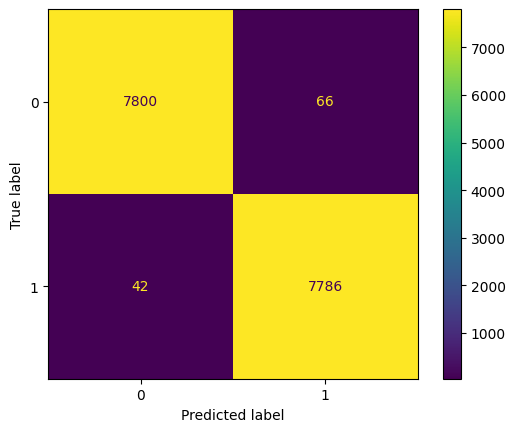

In [33]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=1,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

/Users/nikobiebl/.local/share/virtualenvs/Project-Thesis-PGQKRxl5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:     0.9954122594622149
F1-Score:     0.9954028859660324
Precision:    0.9950217002808271
Recall:       0.9957843638221768

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7866
           1       1.00      1.00      1.00      7828

    accuracy                           1.00     15694
   macro avg       1.00      1.00      1.00     15694
weighted avg       1.00      1.00      1.00     15694




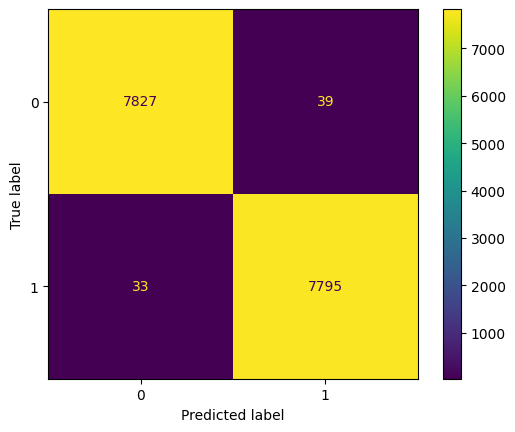

In [34]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=2,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [35]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=3,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=4,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=5,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=6,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=7,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=8,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=9,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

In [ ]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=10,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

## Creating Treshold Evaluation

In [22]:
probabilities = mlp_tfidf_classifier.predict_proba(X_test_tfidf)

probabilities_0 = probabilities[:, 0]
probabilities_1 = probabilities[:, 1]

actual_values = y_test

probabilities_and_values_df = pd.DataFrame({
    'probabilities_0': probabilities_0,
    'probabilities_1': probabilities_1,
    'actual_values': actual_values
})

print(probabilities_and_values_df.shape)
print(probabilities_and_values_df.head(20))

(15694, 3)
       probabilities_0  probabilities_1  actual_values
30578         0.999991         0.000009              0
75285         0.000082         0.999918              1
47368         0.001234         0.998766              1
23969         0.999985         0.000015              0
53099         0.000760         0.999240              1
14076         0.998719         0.001281              0
20565         0.999082         0.000918              0
62974         0.001735         0.998265              1
55285         0.000058         0.999942              1
61165         0.000238         0.999762              1
49031         0.000507         0.999493              1
65834         0.000192         0.999808              1
64319         0.000378         0.999622              1
63695         0.000014         0.999986              1
77050         0.000142         0.999858              1
15197         0.999721         0.000279              0
9908          0.999943         0.000057              0

In [23]:
under_60_percent_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] < 0.6) & (probabilities_and_values_df['probabilities_1'] < 0.60)]

print(under_60_percent_df.shape)
print(under_60_percent_df.head(22))

(20, 3)
       probabilities_0  probabilities_1  actual_values
18138         0.404308         0.595692              0
68458         0.505537         0.494463              1
7251          0.513621         0.486379              0
68747         0.447575         0.552425              1
23754         0.548022         0.451978              0
54503         0.474218         0.525782              1
67647         0.569743         0.430257              1
53020         0.454603         0.545397              1
20964         0.535459         0.464541              0
10684         0.431510         0.568490              0
62644         0.527443         0.472557              1
55116         0.402128         0.597872              1
32906         0.466348         0.533652              0
23131         0.497705         0.502295              0
55352         0.596028         0.403972              1
67921         0.594307         0.405693              1
54001         0.472690         0.527310              1
30

In [24]:
thresholds = np.arange(0.5, 1.0, 0.01)

results = []

for threshold in thresholds:

    classifiable_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] > threshold) | (probabilities_and_values_df['probabilities_1'] > threshold)]
    
    percentage_classifiable = (len(classifiable_df) / len(probabilities_and_values_df)) * 100
    
    predicted_labels = np.where(classifiable_df['probabilities_1'] > threshold, 1, 0)

    accuracy = accuracy_score(classifiable_df['actual_values'], predicted_labels) * 100
    precision = precision_score(classifiable_df['actual_values'], predicted_labels) * 100
    recall = recall_score(classifiable_df['actual_values'], predicted_labels) * 100
    f1 = f1_score(classifiable_df['actual_values'], predicted_labels) * 100

    results.append({
        'threshold': threshold,
        'classifiable': percentage_classifiable,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

results_df = pd.DataFrame(results)

print(results_df.head(50))

    threshold  classifiable    accuracy   precision      recall          f1
0        0.50    100.000000   99.598573   99.591263   99.603986   99.597624
1        0.51     99.987256   99.611267   99.603986   99.616711   99.610348
2        0.52     99.980884   99.611242   99.603986   99.616711   99.610348
3        0.53     99.955397   99.617518   99.603884   99.629346   99.616613
4        0.54     99.942653   99.623844   99.616613   99.629346   99.622979
5        0.55     99.917166   99.630126   99.616564   99.642035   99.629298
6        0.56     99.910794   99.630102   99.616515   99.641990   99.629251
7        0.57     99.898050   99.642812   99.629251   99.654731   99.641990
8        0.58     99.898050   99.642812   99.629251   99.654731   99.641990
9        0.59     99.898050   99.642812   99.629251   99.654731   99.641990
10       0.60     99.872563   99.661860   99.641944   99.680184   99.661060
11       0.61     99.827960   99.680858   99.654643   99.705657   99.680143
12       0.6